In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from openpyxl import Workbook
import matplotlib.pyplot as plt
from openpyxl.drawing.image import Image
from io import BytesIO
#sheet12 = pd.read_excel("C://Users//Piyush//Desktop//Automation//sheet.xlsx")
#xls = pd.ExcelFile("C://Users//Piyush//Desktop//Automation//sheet.xlsx")
#xls.sheet_names
# Create an Excel writer object
# excel_writer = pd.ExcelWriter('combined_tables.xlsx', engine='xlsxwriter')

# # Write the combined DataFrame to a single sheet in the Excel file
# combined_df.to_excel(excel_writer, sheet_name='Combined', index=False)

# # Save the Excel file
# excel_writer.save()
image_buffers = []


C:\ProgramData\Anaconda3\envs\samil\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\envs\samil\lib\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\samil\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
sheet_bidkaro = pd.read_csv("D:/Automation/OutputM//bidkaro//masterfile_bidkaro.csv")
sheet_superbids = pd.read_csv("D:/Automation/OutputM//superbids//masterfile_superbids.csv")
sheet_cardekho = pd.read_csv("D:/Automation/OutputM//cardekho//masterfile_cardekho.csv")
sheet_ediig = pd.read_csv("D:/Automation/OutputM//ediig//masterfile_ediig.csv")
sheet_cte = pd.read_csv("D:/Automation/OutputM//cardekho//masterfile_cardekho.csv")


In [5]:
sheet_ediig

,Make,Product,Lan No,Client,Comp Name,Location,State,Region,Auction Date,Auction Type,Verticle,Month
0,2W,2W-4W-CV-FE,100797831,Idfc Bank,Ediig,Andhra Pradesh,Andhra Pradesh,South,07-24_13-24,Online,Banks Auction,09-Aug-2024
1,2W,2W-4W-CV-FE,106938786,Idfc Bank,Ediig,Andhra Pradesh,Andhra Pradesh,South,07-24_13-24,Online,Banks Auction,09-Aug-2024
2,2W,2W-4W-CV-FE,108015850,Idfc Bank,Ediig,Andhra Pradesh,Andhra Pradesh,South,07-24_13-24,Online,Banks Auction,09-Aug-2024
3,2W,2W-4W-CV-FE,110797801,Idfc Bank,Ediig,Andhra Pradesh,Andhra Pradesh,South,07-24_13-24,Online,Banks Auction,09-Aug-2024
4,2W,2W-4W-CV-FE,112480362,Idfc Bank,Ediig,Andhra Pradesh,Andhra Pradesh,South,07-24_13-24,Online,Banks Auction,09-Aug-2024
...,...,...,...,...,...,...,...,...,...,...,...,...
263,FE,FE,AP3019LN0001794,Tvs Credit Services Ltd,Ediig,Andhra Pradesh,Andhra Pradesh,South,08-09_16-24,Online,NaN,09-Aug-2024
264,FE,FE,AP3019LN0001832,Tvs Credit Services Ltd,Ediig,Andhra Pradesh,Andhra Pradesh,South,08-09_16-24,Online,NaN,09-Aug-2024
265,4W,4w,AP3019CA0003991,Tvs Credit Services Ltd,Ediig,Andhra Pradesh,Andhra Pradesh,South,08-09_16-24,Online,NaN,09-Aug-2024
266,4W,4w,AP3019CA0011583,Tvs Credit Services Ltd,Ediig,Andhra Pradesh,Andhra Pradesh,South,08-09_16-24,Online,NaN,09-Aug-2024


# Table 1 - Count

In [6]:
grouped1_bidkaro = sheet_bidkaro.groupby("Comp Name").size().reset_index(name="No of Unique Listings")
grouped2_superbids = sheet_superbids.groupby("Comp Name").size().reset_index(name="No of Unique Listings")
grouped3_cardekho = sheet_cardekho.groupby("Comp Name").size().reset_index(name="No of Unique Listings")
grouped4_ediig = sheet_ediig.groupby("Comp Name").size().reset_index(name="No of Unique Listings")
grouped5_cte = sheet_cte.groupby("Comp Name").size().reset_index(name="No of Unique Listings")


combined_grouped_count = pd.concat([grouped1_bidkaro, grouped2_superbids,grouped3_cardekho,grouped4_ediig,grouped5_cte], ignore_index=True)

#combined_grouped_count = pd.concat([grouped1_bidkaro, grouped2_superbids,grouped3_cardekho], ignore_index=True)
combined_grouped_count['percentage'] = ((combined_grouped_count['No of Unique Listings'] / combined_grouped_count['No of Unique Listings'].sum()) * 100).round(1)


In [7]:
combined_grouped_count

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,582,3.9
1,Superbids,5149,34.8
2,Cardekho,4388,29.7
3,Ediig,268,1.8
4,Cardekho,4388,29.7


In [8]:
grand_total_row = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': combined_grouped_count['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[combined_grouped_count.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
combined_grouped_count = pd.concat([combined_grouped_count, grand_total_row])

In [9]:
combined_grouped_count  # table 1

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,582,3.9
1,Superbids,5149,34.8
2,Cardekho,4388,29.7
3,Ediig,268,1.8
4,Cardekho,4388,29.7
5,GrandTotal,14775,100.0


In [10]:
# Create a pie chart
buffer1 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    combined_grouped_count['No of Unique Listings'][:-1],
    labels=combined_grouped_count['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of Unique Listings with Mahindra')
plt.legend(wedges, combined_grouped_count['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
#plt.savefig("combined_grouped_count.png", bbox_inches="tight") # added
plt.savefig(buffer1, format='png', bbox_inches="tight")
plt.close()

# Display the chart
#plt.show()
image_buffers.append(buffer1)

# code that added for every image
#buffer1 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
#image_buffers.append(buffer1)




# Table2 - without mahendra count


In [11]:
witout_mahindra_count_bidkaro = sheet_bidkaro[sheet_bidkaro["Client"] != "Mahindra"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
witout_mahindra_count_superbids = sheet_superbids[sheet_superbids["Client"] != "Mahindra"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
witout_mahindra_count_cardekho = sheet_cardekho[sheet_cardekho["Client"] != "Mahindra"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
witout_mahindra_count_ediig = sheet_ediig[sheet_ediig["Client"] != "Mahindra"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
witout_mahindra_count_cte = sheet_cte[sheet_cte["Client"] != "Mahindra"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")

combined_count_withoutmanhindra = pd.concat([witout_mahindra_count_bidkaro, witout_mahindra_count_superbids,witout_mahindra_count_cardekho,witout_mahindra_count_ediig,witout_mahindra_count_cte], ignore_index=True)
#combined_count_withoutmanhindra = pd.concat([witout_mahindra_count_bidkaro,witout_mahindra_count_superbids, witout_mahindra_count_cardekho],ignore_index=True)
combined_count_withoutmanhindra['percentage'] = ((combined_count_withoutmanhindra['No of Unique Listings'] / combined_count_withoutmanhindra['No of Unique Listings'].sum()) * 100).round(1)



combined_count_withoutmanhindra

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,582,3.9
1,Superbids,5149,34.8
2,Cardekho,4388,29.7
3,Ediig,268,1.8
4,Cardekho,4388,29.7


In [12]:
grand_total_withoutm = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': combined_count_withoutmanhindra['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[combined_count_withoutmanhindra.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
combined_count_withoutmanhindra = pd.concat([combined_count_withoutmanhindra, grand_total_withoutm])

In [13]:
combined_count_withoutmanhindra # table 2

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,582,3.9
1,Superbids,5149,34.8
2,Cardekho,4388,29.7
3,Ediig,268,1.8
4,Cardekho,4388,29.7
5,GrandTotal,14775,100.0


In [14]:
buffer2 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    combined_count_withoutmanhindra['No of Unique Listings'][:-1],
    labels=combined_count_withoutmanhindra['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of Unique Listings without Mahindra')
plt.legend(wedges, combined_count_withoutmanhindra['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.savefig("combined_count_withoutmanhindra.png", bbox_inches="tight") # added
plt.savefig(buffer2, format='png', bbox_inches="tight")

# Display the chart
#plt.show()
plt.close()

#buffer1 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer2)


# Table 3 - without 2W and 3W

In [15]:
without_2W_3W_count_bidkaro = sheet_bidkaro[~sheet_bidkaro["Make"].isin(["2W", "3W"])].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_2W_3W_count_superbids = sheet_superbids[~sheet_superbids["Make"].isin(["2W", "3W"])].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_2W_3W_count_cardekho = sheet_cardekho[~sheet_cardekho["Make"].isin(["2W", "3W"])].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_2W_3W_count_ediig = sheet_ediig[~sheet_ediig["Make"].isin(["2W", "3W"])].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_2W_3W_count_cte = sheet_cte[~sheet_cte["Make"].isin(["2W", "3W"])].groupby("Comp Name").size().reset_index(name="No of Unique Listings")


In [16]:
#combined_count_withoutmanhindra = pd.concat([without_2W_3W_count_bidkaro, without_2W_3W_count_superbids,without_2W_3W_count_cardekho,without_2W_3W_count_ediig,without_2W_3W_count_cte],ignore_index=True)
combined_count_without_2W3W = pd.concat([without_2W_3W_count_bidkaro,without_2W_3W_count_superbids, without_2W_3W_count_cardekho,without_2W_3W_count_ediig,without_2W_3W_count_cte],ignore_index=True)
combined_count_without_2W3W['percentage'] = ((combined_count_without_2W3W['No of Unique Listings'] / combined_count_without_2W3W['No of Unique Listings'].sum()) * 100).round()


In [17]:
grand_total_without_2W3W = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': combined_count_without_2W3W['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[combined_count_without_2W3W.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
combined_count_without_2W3W = pd.concat([combined_count_without_2W3W, grand_total_without_2W3W])

In [18]:
combined_count_without_2W3W # table 3

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,169,5.0
1,Superbids,1989,54.0
2,Cardekho,738,20.0
3,Ediig,67,2.0
4,Cardekho,738,20.0
5,GrandTotal,3701,100.0


In [19]:
buffer3 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    combined_count_without_2W3W['No of Unique Listings'][:-1],
    labels=combined_count_without_2W3W['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of listing without 2W and 3W')
plt.legend(wedges, combined_count_without_2W3W['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
#plt.savefig("combined_count_without_2W3W.png", bbox_inches="tight") # added
plt.savefig(buffer3, format='png', bbox_inches="tight")

# Display the chart
#plt.show()
plt.close()


#buffer1 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer3)

# Table 4 - single segment - 2W count of all competitor

In [20]:
with_mahindra_2WCount_bidkaro = sheet_bidkaro[sheet_bidkaro["Make"] == "2W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_2Wcount_superbids = sheet_superbids[sheet_superbids["Make"] == "2W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_2Wcount_cardekho = sheet_cardekho[sheet_cardekho["Make"] == "2W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_2Wcount_ediig = sheet_ediig[sheet_ediig["Make"] == "2W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_2Wcount_cte = sheet_cte[sheet_cte["Make"] == "2W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")


In [21]:
combined_count_withm_2W = pd.concat([with_mahindra_2WCount_bidkaro, with_mahindra_2Wcount_superbids,with_mahindra_2Wcount_cardekho,with_mahindra_2Wcount_ediig,with_mahindra_2Wcount_cte],ignore_index=True)
#combined_count_withm_2W = pd.concat([with_mahindra_2WCount_bidkaro,with_mahindra_2Wcount_superbids, with_mahindra_2Wcount_cardekho],ignore_index=True)
combined_count_withm_2W['percentage'] = ((combined_count_withm_2W['No of Unique Listings'] / combined_count_withm_2W['No of Unique Listings'].sum()) * 100).round(1)


In [22]:
grand_total_withm_2W = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': combined_count_withm_2W['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[combined_count_withm_2W.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
combined_count_withm_2W = pd.concat([combined_count_withm_2W, grand_total_withm_2W])

In [23]:
combined_count_withm_2W # table 4

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,305,2.9
1,Superbids,2608,25.0
2,Cardekho,3650,35.0
3,Ediig,201,1.9
4,Cardekho,3650,35.0
5,GrandTotal,10414,100.0


In [24]:
buffer4 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    combined_count_withm_2W['No of Unique Listings'][:-1],
    labels=combined_count_withm_2W['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of 2W with Mahindra')
plt.legend(wedges, combined_count_withm_2W['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
#plt.savefig("combined_count_withm_2W.png", bbox_inches="tight") # added
plt.savefig(buffer4, format='png', bbox_inches="tight")

# Display the chart
#plt.show()
plt.close()



#buffer1 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer4)

# Table 5 - single segment - 3W count of all competitor

In [25]:
with_mahindra_3WCount_bidkaro = sheet_bidkaro[sheet_bidkaro["Make"] == "3W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_3Wcount_superbids = sheet_superbids[sheet_superbids["Make"] == "3W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_3Wcount_cardekho = sheet_cardekho[sheet_cardekho["Make"] == "3W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_3Wcount_ediig = sheet_ediig[sheet_ediig["Make"] == "3W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_3Wcount_cte = sheet_cte[sheet_cte["Make"] == "3W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")


In [26]:
combined_count_withm_3W = pd.concat([with_mahindra_3WCount_bidkaro, with_mahindra_3Wcount_superbids,with_mahindra_3Wcount_cardekho,with_mahindra_3Wcount_ediig,with_mahindra_3Wcount_cte],ignore_index=True)
#combined_count_withm_3W = pd.concat([with_mahindra_3WCount_bidkaro,with_mahindra_3Wcount_superbids, with_mahindra_3Wcount_cardekho],ignore_index=True)
combined_count_withm_3W['percentage'] = ((combined_count_withm_3W['No of Unique Listings'] / combined_count_withm_3W['No of Unique Listings'].sum()) * 100).round(1)


In [27]:
combined_count_withm_3W

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,108,16.4
1,Superbids,552,83.6


In [28]:
grand_total_withm_3W = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': combined_count_withm_3W['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[combined_count_withm_3W.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
combined_count_withm_3W = pd.concat([combined_count_withm_3W, grand_total_withm_3W])

In [29]:
combined_count_withm_3W # table 5

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,108,16.4
1,Superbids,552,83.6
2,GrandTotal,660,100.0


In [30]:
buffer5 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    combined_count_withm_3W['No of Unique Listings'][:-1],
    labels=combined_count_withm_3W['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of 3W with Mahindra')
plt.legend(wedges, combined_count_withm_3W['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
#plt.savefig("combined_count_withm_3W.png", bbox_inches="tight") # added
plt.savefig(buffer5, format='png', bbox_inches="tight")

# Display the chart
#plt.show()
plt.close()

#buffer1 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer5)


# Table 6 - single segment - 4W count of all competitor

In [31]:
with_mahindra_4WCount_bidkaro = sheet_bidkaro[sheet_bidkaro["Make"] == "4W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_4Wcount_superbids = sheet_superbids[sheet_superbids["Make"] == "4W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_4Wcount_cardekho = sheet_cardekho[sheet_cardekho["Make"] == "4W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_4Wcount_ediig = sheet_ediig[sheet_ediig["Make"] == "4W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_4Wcount_cte = sheet_cte[sheet_cte["Make"] == "4W"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")


In [32]:
combined_count_withm_4W = pd.concat([with_mahindra_4WCount_bidkaro, with_mahindra_4Wcount_superbids,with_mahindra_4Wcount_cardekho,with_mahindra_4Wcount_ediig,with_mahindra_4Wcount_cte],ignore_index=True)
#combined_count_withm_4W = pd.concat([with_mahindra_4WCount_bidkaro,with_mahindra_4Wcount_superbids, with_mahindra_4Wcount_cardekho],ignore_index=True)
combined_count_withm_4W['percentage'] = ((combined_count_withm_4W['No of Unique Listings'] / combined_count_withm_4W['No of Unique Listings'].sum()) * 100).round(1)


In [33]:
grand_total_withm_4W = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': combined_count_withm_4W['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[combined_count_withm_4W.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
combined_count_withm_4W = pd.concat([combined_count_withm_4W, grand_total_withm_4W])

In [34]:
combined_count_withm_4W # table 6

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,26,1.9
1,Superbids,486,35.6
2,Cardekho,404,29.6
3,Ediig,44,3.2
4,Cardekho,404,29.6
5,GrandTotal,1364,100.0


In [35]:
buffer6 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    combined_count_withm_4W['No of Unique Listings'][:-1],
    labels=combined_count_withm_4W['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of 4W with Mahindra')
plt.legend(wedges, combined_count_withm_4W['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
#plt.savefig("combined_count_withm_4W.png", bbox_inches="tight") # added
plt.savefig(buffer6, format='png', bbox_inches="tight")

# Display the chart
#plt.show()
plt.close()

#buffer1 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer6)



# Table 7 - single segment - CV count of all competitor

In [36]:
with_mahindra_CVCount_bidkaro = sheet_bidkaro[sheet_bidkaro["Make"] == "CV"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_CVcount_superbids = sheet_superbids[sheet_superbids["Make"] == "CV"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_CVcount_cardekho = sheet_cardekho[sheet_cardekho["Make"] == "CV"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_CVcount_ediig = sheet_ediig[sheet_ediig["Make"] == "CV"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_CVcount_cte = sheet_cte[sheet_cte["Make"] == "CV"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")


In [37]:
combined_count_withm_CV = pd.concat([with_mahindra_CVCount_bidkaro, with_mahindra_CVcount_superbids,with_mahindra_CVcount_cardekho,with_mahindra_CVcount_ediig,with_mahindra_CVcount_cte],ignore_index=True)
#combined_count_withm_CV = pd.concat([with_mahindra_CVCount_bidkaro,with_mahindra_CVcount_superbids, with_mahindra_CVcount_cardekho],ignore_index=True)
combined_count_withm_CV['percentage'] = ((combined_count_withm_CV['No of Unique Listings'] / combined_count_withm_CV['No of Unique Listings'].sum()) * 100).round(1)


In [38]:
grand_total_withm_CV = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': combined_count_withm_CV['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[combined_count_withm_CV.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
combined_count_withm_CV = pd.concat([combined_count_withm_CV, grand_total_withm_CV])

In [39]:
combined_count_withm_CV # table 7

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,43,3.6
1,Superbids,826,68.5
2,Cardekho,167,13.9
3,Ediig,2,0.2
4,Cardekho,167,13.9
5,GrandTotal,1205,100.0


In [40]:
buffer7 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    combined_count_withm_CV['No of Unique Listings'][:-1],
    labels=combined_count_withm_CV['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of CV with Mahindra')
plt.legend(wedges, combined_count_withm_CV['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
#plt.savefig("combined_count_withm_CV.png", bbox_inches="tight") # added
plt.savefig(buffer7, format='png', bbox_inches="tight")

# Display the chart
#plt.show()
plt.close()


#buffer1 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer7)


# Table 7 - single segment - CE count of all competitor

In [41]:
with_mahindra_CECount_bidkaro = sheet_bidkaro[sheet_bidkaro["Make"] == "CE"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_CEcount_superbids = sheet_superbids[sheet_superbids["Make"] == "CE"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_CEcount_cardekho = sheet_cardekho[sheet_cardekho["Make"] == "CE"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_CEcount_ediig = sheet_ediig[sheet_ediig["Make"] == "CE"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_CEcount_cte = sheet_cte[sheet_cte["Make"] == "CE"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")


In [42]:
combined_count_withm_CE = pd.concat([with_mahindra_CECount_bidkaro, with_mahindra_CEcount_superbids,with_mahindra_CEcount_cardekho,with_mahindra_CEcount_ediig,with_mahindra_CEcount_cte],ignore_index=True)
#combined_count_withm_CE = pd.concat([with_mahindra_CECount_bidkaro,with_mahindra_CEcount_superbids, with_mahindra_CEcount_cardekho],ignore_index=True)
combined_count_withm_CE['percentage'] = ((combined_count_withm_CE['No of Unique Listings'] / combined_count_withm_CE['No of Unique Listings'].sum()) * 100).round(1)


In [43]:
grand_total_withm_CE = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': combined_count_withm_CE['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[combined_count_withm_CE.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
combined_count_withm_CE = pd.concat([combined_count_withm_CE, grand_total_withm_CE])

In [44]:
combined_count_withm_CE # table 8

,Comp Name,No of Unique Listings,percentage
0,Superbids,252,96.9
1,Cardekho,4,1.5
2,Cardekho,4,1.5
3,GrandTotal,260,100.0


In [45]:
buffer8 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    combined_count_withm_CE['No of Unique Listings'][:-1],
    labels=combined_count_withm_CE['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of CE with Mahindra')
plt.legend(wedges, combined_count_withm_CE['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
#plt.savefig("combined_count_withm_CE.png", bbox_inches="tight") # added
plt.savefig(buffer8, format='png', bbox_inches="tight")

# Display the chart
#plt.show()
plt.close()


#buffer1 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer8)

# Table 7 - single segment - FE count of all competitor

In [46]:
with_mahindra_FECount_bidkaro = sheet_bidkaro[sheet_bidkaro["Make"] == "FE"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_FEcount_superbids = sheet_superbids[sheet_superbids["Make"] == "FE"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_FEcount_cardekho = sheet_cardekho[sheet_cardekho["Make"] == "FE"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_FEcount_ediig = sheet_ediig[sheet_ediig["Make"] == "FE"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
with_mahindra_FEcount_cte = sheet_cte[sheet_cte["Make"] == "FE"].groupby("Comp Name").size().reset_index(name="No of Unique Listings")


In [47]:
combined_count_withm_FE = pd.concat([with_mahindra_FECount_bidkaro, with_mahindra_FEcount_superbids,with_mahindra_FEcount_cardekho,with_mahindra_FEcount_ediig,with_mahindra_FEcount_cte],ignore_index=True)
#combined_count_withm_FE = pd.concat([with_mahindra_FECount_bidkaro,with_mahindra_FEcount_superbids, with_mahindra_FEcount_cardekho],ignore_index=True)
combined_count_withm_FE['percentage'] = ((combined_count_withm_FE['No of Unique Listings'] / combined_count_withm_FE['No of Unique Listings'].sum()) * 100).round(1)


In [48]:
grand_total_withm_FE = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': combined_count_withm_FE['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[combined_count_withm_FE.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
combined_count_withm_FE = pd.concat([combined_count_withm_FE, grand_total_withm_FE])

In [49]:
combined_count_withm_FE #table 9

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,100,11.5
1,Superbids,425,48.7
2,Cardekho,163,18.7
3,Ediig,21,2.4
4,Cardekho,163,18.7
5,GrandTotal,872,100.0


In [50]:
buffer9 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    combined_count_withm_FE['No of Unique Listings'][:-1],
    labels=combined_count_withm_FE['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of FE with Mahindra')
plt.legend(wedges, combined_count_withm_FE['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
#plt.savefig("combined_count_withm_FE.png", bbox_inches="tight") # added
plt.savefig(buffer9, format='png', bbox_inches="tight")

# Display the chart
#plt.show()
plt.close()


#buffer1 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer9)


# Table 8 - single segment count without mahindra - 2W count of all competitor

In [51]:
without_m_2W_count_bidkaro = sheet_bidkaro[(sheet_bidkaro["Make"] == "2W") & (sheet_bidkaro["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_2W_count_superbids = sheet_superbids[(sheet_superbids["Make"] == "2W") & (sheet_superbids["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_2W_count_cardekho = sheet_cardekho[(sheet_cardekho["Make"] == "2W") & (sheet_cardekho["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_2W_count_ediig = sheet_ediig[(sheet_ediig["Make"] == "2W") & (sheet_ediig["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_2W_count_cte = sheet_cte[(sheet_cte["Make"] == "2W") & (sheet_cte["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")


In [52]:
count_withoutm_2W = pd.concat([without_m_2W_count_bidkaro, without_m_2W_count_superbids,without_m_2W_count_cardekho,without_m_2W_count_ediig,without_m_2W_count_cte],ignore_index=True)
#count_withoutm_2W = pd.concat([without_m_2W_count_bidkaro, without_m_2W_count_superbids,without_m_2W_count_cardekho],ignore_index=True)
count_withoutm_2W['percentage'] = ((count_withoutm_2W['No of Unique Listings'] / count_withoutm_2W['No of Unique Listings'].sum()) * 100).round(1)


In [53]:
grand_total_without_mahindra_2W = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': count_withoutm_2W['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[count_withoutm_2W.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
count_withoutm_2W = pd.concat([count_withoutm_2W, grand_total_without_mahindra_2W])

In [54]:
count_withoutm_2W # table 10

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,305,2.9
1,Superbids,2608,25.0
2,Cardekho,3650,35.0
3,Ediig,201,1.9
4,Cardekho,3650,35.0
5,GrandTotal,10414,100.0


In [55]:
buffer10 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    count_withoutm_2W['No of Unique Listings'][:-1],
    labels=count_withoutm_2W['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of 2W without Mahindra')
plt.legend(wedges, count_withoutm_2W['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
#plt.savefig("count_withoutm_2W.png", bbox_inches="tight") # added
plt.savefig(buffer10, format='png', bbox_inches="tight")

# Display the chart
#plt.show()
plt.close()

#buffer1 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer10)



### Count of 3W without mahindra

In [56]:
without_m_3W_count_bidkaro = sheet_bidkaro[(sheet_bidkaro["Make"] == "3W") & (sheet_bidkaro["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_3W_count_superbids = sheet_superbids[(sheet_superbids["Make"] == "3W") & (sheet_superbids["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_3W_count_cardekho = sheet_cardekho[(sheet_cardekho["Make"] == "3W") & (sheet_cardekho["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_3W_count_ediig = sheet_ediig[(sheet_ediig["Make"] == "3W") & (sheet_ediig["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_3W_count_cte = sheet_cte[(sheet_cte["Make"] == "3W") & (sheet_cte["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")


In [57]:
count_withoutm_3W = pd.concat([without_m_3W_count_bidkaro, without_m_3W_count_superbids,without_m_3W_count_cardekho,without_m_3W_count_ediig,without_m_3W_count_cte],ignore_index=True)
#count_withoutm_3W = pd.concat([without_m_3W_count_bidkaro, without_m_3W_count_superbids,without_m_3W_count_cardekho],ignore_index=True)
count_withoutm_3W['percentage'] = ((count_withoutm_3W['No of Unique Listings'] / count_withoutm_3W['No of Unique Listings'].sum()) * 100).round(1)


In [58]:
grand_total_without_mahindra_3W = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': count_withoutm_3W['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[count_withoutm_3W.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
count_withoutm_3W = pd.concat([count_withoutm_3W, grand_total_without_mahindra_3W])

In [59]:
count_withoutm_3W # table 11

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,108,16.4
1,Superbids,552,83.6
2,GrandTotal,660,100.0


In [60]:
buffer11 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    count_withoutm_3W['No of Unique Listings'][:-1],
    labels=count_withoutm_3W['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of 3W without Mahindra')
plt.legend(wedges, count_withoutm_3W['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.savefig("count_withoutm_3W.png", bbox_inches="tight") # added
plt.savefig(buffer11, format='png', bbox_inches="tight")

# Display the chart
#plt.show()
plt.close()


#buffer11 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer11)


# Count of 4W without mahindra

In [61]:
without_m_4W_count_bidkaro = sheet_bidkaro[(sheet_bidkaro["Make"] == "4W") & (sheet_bidkaro["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_4W_count_superbids = sheet_superbids[(sheet_superbids["Make"] == "4W") & (sheet_superbids["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_4W_count_cardekho = sheet_cardekho[(sheet_cardekho["Make"] == "4W") & (sheet_cardekho["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_4W_count_ediig = sheet_ediig[(sheet_ediig["Make"] == "4W") & (sheet_ediig["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_4W_count_cte = sheet_cte[(sheet_cte["Make"] == "4W") & (sheet_cte["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")


In [62]:
count_withoutm_4W = pd.concat([without_m_4W_count_bidkaro, without_m_4W_count_superbids,without_m_4W_count_cardekho,without_m_4W_count_ediig,without_m_4W_count_cte],ignore_index=True)
#count_withoutm_4W = pd.concat([without_m_4W_count_bidkaro, without_m_4W_count_superbids,without_m_4W_count_cardekho],ignore_index=True)
count_withoutm_4W['percentage'] = ((count_withoutm_4W['No of Unique Listings'] / count_withoutm_4W['No of Unique Listings'].sum()) * 100).round(1)


In [63]:
grand_total_without_mahindra_4W = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': count_withoutm_4W['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[count_withoutm_4W.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
count_withoutm_4W = pd.concat([count_withoutm_4W, grand_total_without_mahindra_4W])

In [64]:
count_withoutm_4W

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,26,1.9
1,Superbids,486,35.6
2,Cardekho,404,29.6
3,Ediig,44,3.2
4,Cardekho,404,29.6
5,GrandTotal,1364,100.0


In [65]:
buffer12 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    count_withoutm_4W['No of Unique Listings'][:-1],
    labels=count_withoutm_4W['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of 4W without Mahindra')
plt.legend(wedges, count_withoutm_4W['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
#plt.savefig("count_withoutm_4W.png", bbox_inches="tight") # added
plt.savefig(buffer12, format='png', bbox_inches="tight")

# Display the chart
#plt.show()
plt.close()


#buffer11 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer12)


# Count of CV without mahindra

In [66]:
without_m_CV_count_bidkaro = sheet_bidkaro[(sheet_bidkaro["Make"] == "CV") & (sheet_bidkaro["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_CV_count_superbids = sheet_superbids[(sheet_superbids["Make"] == "CV") & (sheet_superbids["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_CV_count_cardekho = sheet_cardekho[(sheet_cardekho["Make"] == "CV") & (sheet_cardekho["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_CV_count_ediig = sheet_ediig[(sheet_ediig["Make"] == "CV") & (sheet_ediig["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_CV_count_cte = sheet_cte[(sheet_cte["Make"] == "CV") & (sheet_cte["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")


In [67]:
count_withoutm_CV = pd.concat([without_m_CV_count_bidkaro, without_m_CV_count_superbids,without_m_CV_count_cardekho,without_m_CV_count_ediig,without_m_CV_count_cte],ignore_index=True)
#count_withoutm_CV = pd.concat([without_m_CV_count_bidkaro, without_m_CV_count_superbids,without_m_CV_count_cardekho],ignore_index=True)
count_withoutm_CV['percentage'] = ((count_withoutm_CV['No of Unique Listings'] / count_withoutm_CV['No of Unique Listings'].sum()) * 100).round(1)


In [68]:
grand_total_without_mahindra_CV = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': count_withoutm_CV['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[count_withoutm_CV.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
count_withoutm_CV = pd.concat([count_withoutm_CV, grand_total_without_mahindra_CV])

In [69]:
count_withoutm_CV

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,43,3.6
1,Superbids,826,68.5
2,Cardekho,167,13.9
3,Ediig,2,0.2
4,Cardekho,167,13.9
5,GrandTotal,1205,100.0


In [70]:
buffer13 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    count_withoutm_CV['No of Unique Listings'][:-1],
    labels=count_withoutm_CV['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of CV without Mahindra')
plt.legend(wedges, count_withoutm_CV['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
#plt.savefig("count_withoutm_CV.png", bbox_inches="tight") # added
plt.savefig(buffer13, format='png', bbox_inches="tight")

# Display the chart
#plt.show()
plt.close()

#buffer11 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer13)


# Count of CE without mahindra

In [71]:
without_m_CE_count_bidkaro = sheet_bidkaro[(sheet_bidkaro["Make"] == "CE") & (sheet_bidkaro["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_CE_count_superbids = sheet_superbids[(sheet_superbids["Make"] == "CE") & (sheet_superbids["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_CE_count_cardekho = sheet_cardekho[(sheet_cardekho["Make"] == "CE") & (sheet_cardekho["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_CE_count_ediig = sheet_ediig[(sheet_ediig["Make"] == "CE") & (sheet_ediig["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_CE_count_cte = sheet_cte[(sheet_cte["Make"] == "CE") & (sheet_cte["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")


In [72]:
count_withoutm_CE = pd.concat([without_m_CE_count_bidkaro, without_m_CE_count_superbids,without_m_CE_count_cardekho,without_m_CE_count_ediig,without_m_CE_count_cte],ignore_index=True)
#count_withoutm_CE = pd.concat([without_m_CE_count_bidkaro, without_m_CE_count_superbids,without_m_CE_count_cardekho],ignore_index=True)
count_withoutm_CE['percentage'] = ((count_withoutm_CE['No of Unique Listings'] / count_withoutm_CE['No of Unique Listings'].sum()) * 100).round(1)


In [73]:
grand_total_without_mahindra_CE = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': count_withoutm_CE['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[count_withoutm_CE.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
count_withoutm_CE = pd.concat([count_withoutm_CE, grand_total_without_mahindra_CE])

In [74]:
count_withoutm_CE

,Comp Name,No of Unique Listings,percentage
0,Superbids,252,96.9
1,Cardekho,4,1.5
2,Cardekho,4,1.5
3,GrandTotal,260,100.0


In [75]:
buffer14 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    count_withoutm_CE['No of Unique Listings'][:-1],
    labels=count_withoutm_CE['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of CE without Mahindra')
plt.legend(wedges, count_withoutm_CE['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
#plt.savefig("count_withoutm_CE.png", bbox_inches="tight")
plt.savefig(buffer14, format='png', bbox_inches="tight")

# Display the chart
#plt.show()
plt.close()

#buffer11 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer14)


# Count of FE without mahindra

In [76]:
without_m_FE_count_bidkaro = sheet_bidkaro[(sheet_bidkaro["Make"] == "FE") & (sheet_bidkaro["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_FE_count_superbids = sheet_superbids[(sheet_superbids["Make"] == "FE") & (sheet_superbids["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_FE_count_cardekho = sheet_cardekho[(sheet_cardekho["Make"] == "FE") & (sheet_cardekho["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_FE_count_ediig = sheet_ediig[(sheet_ediig["Make"] == "FE") & (sheet_ediig["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")
without_m_FE_count_cte = sheet_cte[(sheet_cte["Make"] == "FE") & (sheet_cte["Client"] != "Mahindra")].groupby("Comp Name").size().reset_index(name="No of Unique Listings")


In [77]:
count_withoutm_FE = pd.concat([without_m_FE_count_bidkaro, without_m_FE_count_superbids,without_m_FE_count_cardekho,without_m_FE_count_ediig,without_m_FE_count_cte],ignore_index=True)
#count_withoutm_FE = pd.concat([without_m_FE_count_bidkaro, without_m_FE_count_superbids,without_m_FE_count_cardekho],ignore_index=True)
count_withoutm_FE['percentage'] = ((count_withoutm_FE['No of Unique Listings'] / count_withoutm_FE['No of Unique Listings'].sum()) * 100).round(1)


In [78]:
grand_total_without_mahindra_FE = pd.DataFrame({
    'Comp Name': ['GrandTotal'],
    'No of Unique Listings': count_withoutm_FE['No of Unique Listings'].sum(),
    'percentage': 100
}, index=[count_withoutm_FE.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
count_withoutm_FE = pd.concat([count_withoutm_FE, grand_total_without_mahindra_FE])

In [79]:
count_withoutm_FE

,Comp Name,No of Unique Listings,percentage
0,Bidkaro,100,11.5
1,Superbids,425,48.7
2,Cardekho,163,18.7
3,Ediig,21,2.4
4,Cardekho,163,18.7
5,GrandTotal,872,100.0


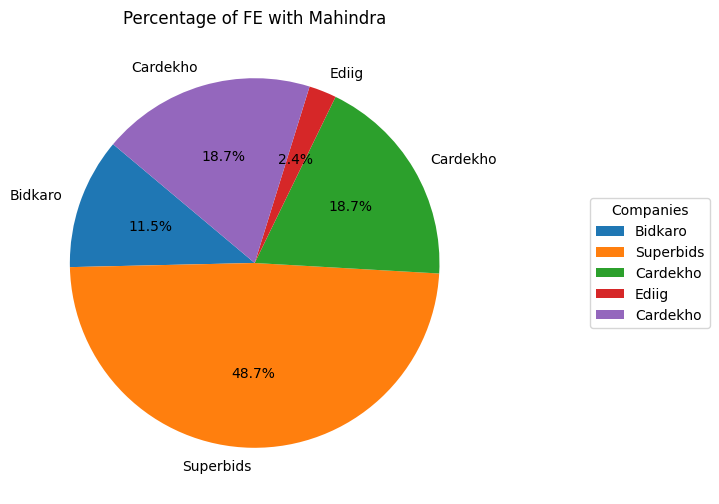

In [80]:
buffer15 = BytesIO()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    count_withoutm_FE['No of Unique Listings'][:-1],
    labels=count_withoutm_FE['Comp Name'][:-1],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of FE with Mahindra')
plt.legend(wedges, count_withoutm_FE['Comp Name'][:-1], title="Companies", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
#plt.savefig("count_withoutm_FE.png", bbox_inches="tight")
plt.savefig(buffer15, format='png', bbox_inches="tight")

# Display the chart
plt.show()


#buffer11 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer15)


# Count of each client on the basis of verticle

# Banks Auction

In [81]:
bank_client_count_bidkaro=sheet_bidkaro[sheet_bidkaro['Verticle'] == 'Banks Auction'].groupby('Client').size().reset_index(name = 'Bidkaro').sort_values(by ='Client')
bank_client_count_superbids=sheet_superbids[sheet_superbids['Verticle'] == 'Banks Auction'].groupby('Client').size().reset_index(name = 'Superbids').sort_values(by = 'Client')
bank_client_count_cardekho=sheet_cardekho[sheet_cardekho['Verticle'] == 'Banks Auction'].groupby('Client').size().reset_index(name = 'Cardekho').sort_values(by = 'Client')
bank_client_count_ediig=sheet_ediig[sheet_ediig['Verticle'] == 'Banks Auction'].groupby('Client').size().reset_index(name = 'Ediig').sort_values(by = 'Client')
bank_client_count_cte=sheet_cte[sheet_cte['Verticle'] == 'Banks Auction'].groupby('Client').size().reset_index(name = 'CTE').sort_values(by = 'Client')

bank_count = pd.concat([bank_client_count_bidkaro,bank_client_count_superbids,bank_client_count_cardekho,bank_client_count_ediig,bank_client_count_cte],ignore_index = True)



In [82]:
bank_count = bank_count.fillna(0)
#bank_count = bank_count.apply(pd.to_numeric, errors='ignore')
bank_count['Grand Total'] = bank_count.iloc[:, 1:].sum(axis=1)



In [83]:
bank_count

,Client,Bidkaro,Superbids,Cardekho,Ediig,CTE,Grand Total
0,ICICI Bank,106.0,0.0,0.0,0.0,0.0,106.0
1,Kotak Bank,53.0,0.0,0.0,0.0,0.0,53.0
2,Bajaj Finance,0.0,2291.0,0.0,0.0,0.0,2291.0
3,CNHI,0.0,23.0,0.0,0.0,0.0,23.0
4,CNHI FE CE Karnataka Online Auction,0.0,5.0,0.0,0.0,0.0,5.0
5,CWC,0.0,21.0,0.0,0.0,0.0,21.0
6,Indusind Bank,0.0,12.0,0.0,0.0,0.0,12.0
7,Kotak Bank,0.0,554.0,0.0,0.0,0.0,554.0
8,Kotak Prime,0.0,65.0,0.0,0.0,0.0,65.0
9,Manappuram,0.0,1.0,0.0,0.0,0.0,1.0


In [84]:
grand_total_column_wise = pd.DataFrame({
    'Client': ['GrandTotal_column_wise'],
    'Bidkaro': bank_count['Bidkaro'].sum(),
    'Superbids': bank_count['Superbids'].sum(),
    'Cardekho': bank_count['Cardekho'].sum(),
    'Ediig': bank_count['Ediig'].sum(),
    'CTE': bank_count['CTE'].sum(),
    'Grand Total':bank_count['Grand Total'].sum()
}, index=[bank_count.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
count_bank_auction = pd.concat([bank_count, grand_total_column_wise])

In [85]:
count_bank_auction

,Client,Bidkaro,Superbids,Cardekho,Ediig,CTE,Grand Total
0,ICICI Bank,106.0,0.0,0.0,0.0,0.0,106.0
1,Kotak Bank,53.0,0.0,0.0,0.0,0.0,53.0
2,Bajaj Finance,0.0,2291.0,0.0,0.0,0.0,2291.0
3,CNHI,0.0,23.0,0.0,0.0,0.0,23.0
4,CNHI FE CE Karnataka Online Auction,0.0,5.0,0.0,0.0,0.0,5.0
5,CWC,0.0,21.0,0.0,0.0,0.0,21.0
6,Indusind Bank,0.0,12.0,0.0,0.0,0.0,12.0
7,Kotak Bank,0.0,554.0,0.0,0.0,0.0,554.0
8,Kotak Prime,0.0,65.0,0.0,0.0,0.0,65.0
9,Manappuram,0.0,1.0,0.0,0.0,0.0,1.0


In [86]:
count_bank_auction['CTE %'] = ((count_bank_auction['CTE'] / count_bank_auction['Grand Total']) * 100).round()

count_bank_auction

,Client,Bidkaro,Superbids,Cardekho,Ediig,CTE,Grand Total,CTE %
0,ICICI Bank,106.0,0.0,0.0,0.0,0.0,106.0,0.0
1,Kotak Bank,53.0,0.0,0.0,0.0,0.0,53.0,0.0
2,Bajaj Finance,0.0,2291.0,0.0,0.0,0.0,2291.0,0.0
3,CNHI,0.0,23.0,0.0,0.0,0.0,23.0,0.0
4,CNHI FE CE Karnataka Online Auction,0.0,5.0,0.0,0.0,0.0,5.0,0.0
5,CWC,0.0,21.0,0.0,0.0,0.0,21.0,0.0
6,Indusind Bank,0.0,12.0,0.0,0.0,0.0,12.0,0.0
7,Kotak Bank,0.0,554.0,0.0,0.0,0.0,554.0,0.0
8,Kotak Prime,0.0,65.0,0.0,0.0,0.0,65.0,0.0
9,Manappuram,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [87]:
count_bank_auction=count_bank_auction.iloc[:-1,:-2]
# Set 'Client' column as the index for plotting
count_bank_auction.set_index('Client', inplace=True)

# Calculate the sum for each column (excluding the 'Client' column)
column_sums = count_bank_auction.sum()

# Create a pie chart for the column sums
buffer16 = BytesIO()

plt.figure(figsize=(6, 6))
plt.pie(column_sums, labels=column_sums.index, autopct='%.1f%%', startangle=140)
plt.title('Percentage of Column Sums for Banks Auction')
#plt.savefig("Banksauction.png", bbox_inches="tight")
plt.savefig(buffer16, format='png', bbox_inches="tight")

#plt.show()
plt.close()


#buffer11 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer16)


In [88]:
private_client_count_bidkaro=sheet_bidkaro[sheet_bidkaro['Verticle'] == 'Private Auction'].groupby('Client').size().reset_index(name = 'Bidkaro').sort_values(by = 'Client')
private_client_count_superbids=sheet_superbids[sheet_superbids['Verticle'] == 'Private Auction'].groupby('Client').size().reset_index(name = 'Superbids').sort_values(by = 'Client')
private_client_count_cardekho=sheet_cardekho[sheet_cardekho['Verticle'] == 'Private Auction'].groupby('Client').size().reset_index(name = 'Cardekho').sort_values(by = 'Client')
private_client_count_ediig=sheet_ediig[sheet_ediig['Verticle'] == 'Private Auction'].groupby('Client').size().reset_index(name = 'Ediig').sort_values(by = 'Client')
private_client_count_cte=sheet_cte[sheet_cte['Verticle'] == 'Private Auction'].groupby('Client').size().reset_index(name = 'CTE').sort_values(by = 'Client')

private_client_count = pd.concat([private_client_count_bidkaro,private_client_count_superbids,private_client_count_cardekho,private_client_count_ediig,private_client_count_cte],ignore_index = True)



In [89]:
private_client_count = private_client_count.fillna(0)
#bank_count = bank_count.apply(pd.to_numeric, errors='ignore')
private_client_count['Grand Total'] = private_client_count.iloc[:, 1:].sum(axis=1)


In [90]:
grand_total_column_private = pd.DataFrame({
    'Client': ['GrandTotal_column_wise'],
    'Bidkaro': private_client_count['Bidkaro'].sum(),
    'Superbids': private_client_count['Superbids'].sum(),
    'Cardekho': private_client_count['Cardekho'].sum(),
    'Ediig': private_client_count['Ediig'].sum(),
    'CTE': private_client_count['CTE'].sum(),
    'Grand Total':private_client_count['Grand Total'].sum()
}, index=[private_client_count.shape[0]])

# Concatenate the GrandTotal row to the DataFrame
count_private_auction = pd.concat([private_client_count, grand_total_column_private])

In [91]:
count_private_auction

,Client,Bidkaro,Superbids,Cardekho,Ediig,CTE,Grand Total
0,Bajaj Finance,240.0,0.0,0.0,0.0,0.0,240.0
1,TVS Credit,183.0,0.0,0.0,0.0,0.0,183.0
2,Bajaj Finance,0.0,2.0,0.0,0.0,0.0,2.0
3,HDBFS,0.0,781.0,0.0,0.0,0.0,781.0
4,Manappuram,0.0,260.0,0.0,0.0,0.0,260.0
5,Manba Finance,0.0,1.0,0.0,0.0,0.0,1.0
6,Muthoot Vehicle,0.0,27.0,0.0,0.0,0.0,27.0
7,Sai Point,0.0,35.0,0.0,0.0,0.0,35.0
8,TVS,0.0,82.0,0.0,0.0,0.0,82.0
9,Toyota Finance,0.0,96.0,0.0,0.0,0.0,96.0


In [92]:
count_private_auction['CTE %'] = ((count_private_auction['CTE'] / count_private_auction['Grand Total']) * 100).round()

count_private_auction

,Client,Bidkaro,Superbids,Cardekho,Ediig,CTE,Grand Total,CTE %
0,Bajaj Finance,240.0,0.0,0.0,0.0,0.0,240.0,0.0
1,TVS Credit,183.0,0.0,0.0,0.0,0.0,183.0,0.0
2,Bajaj Finance,0.0,2.0,0.0,0.0,0.0,2.0,0.0
3,HDBFS,0.0,781.0,0.0,0.0,0.0,781.0,0.0
4,Manappuram,0.0,260.0,0.0,0.0,0.0,260.0,0.0
5,Manba Finance,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,Muthoot Vehicle,0.0,27.0,0.0,0.0,0.0,27.0,0.0
7,Sai Point,0.0,35.0,0.0,0.0,0.0,35.0,0.0
8,TVS,0.0,82.0,0.0,0.0,0.0,82.0,0.0
9,Toyota Finance,0.0,96.0,0.0,0.0,0.0,96.0,0.0


In [93]:
count_private_auction=count_private_auction.iloc[:-1,:-2]
# Set 'Client' column as the index for plotting
count_private_auction.set_index('Client', inplace=True)

# Calculate the sum for each column (excluding the 'Client' column)
column_sums = count_private_auction.sum()

# Create a pie chart for the column sums
buffer17 = BytesIO()

plt.figure(figsize=(6, 6))
plt.pie(column_sums, labels=column_sums.index, autopct='%.1f%%', startangle=140)
plt.title('Percentage of Column Sums for Private Auction')
#plt.savefig("Privateauction.png", bbox_inches="tight")
plt.savefig(buffer17, format='png', bbox_inches="tight")

#plt.show()
plt.close()


#buffer11 = BytesIO()
#plt.savefig(buffer1, format='png', bbox_inches="tight")
#plt.close()
image_buffers.append(buffer17)


# Below piechart of it's dataframe

In [95]:


# Save the pie chart as an image

# Load the Excel file
wb = Workbook()
ws = wb.active
#images =['pie_chart1.png','pie_chart2.png']

table_names = ["Count of all Segment", "Count of all segment without mahindra","Count without 2W and 3W",
               "2W count with mahindra", "3W count with mahindra","4W count with mahindra",
             "CV count with mahindra","CE count with mahindra","FE count with mahindra",
              "2W count without mahindra", "3W count without mahindra","4W count without mahindra",
             "CV count without mahindra","CE count without mahindra","FE count without mahindra","Banks Auction Count","Private Auction Count"]






images = image_buffers
# images = ['combined_grouped_count.png','combined_count_withoutmanhindra.png','combined_count_without_2W3W.png',
#          'combined_count_withm_2W.png','combined_count_withm_3W.png','combined_count_withm_4W.png','combined_count_withm_CV.png',
#         'combined_count_withm_CE.png','combined_count_withm_FE.png','count_withoutm_2W.png','count_withoutm_3W.png',
#          'count_withoutm_4W.png','count_withoutm_CV.png','count_withoutm_CE.png','count_withoutm_FE.png','Banksauction.png','Privateauction.png']


dataframes = [combined_grouped_count,combined_count_withoutmanhindra,combined_count_without_2W3W,combined_count_withm_2W,combined_count_withm_3W,
combined_count_withm_4W,combined_count_withm_CV,combined_count_withm_CE,combined_count_withm_FE,count_withoutm_2W,count_withoutm_3W,
count_withoutm_4W,count_withoutm_CV,count_withoutm_CE,count_withoutm_FE,count_bank_auction,count_private_auction]


#dataframes = [count_withoutm_CE,count_withoutm_FE]
#table_names = ["Table 1", "Table 2"]
#images =['pie_chart1.png','pie_chart2.png']
current_row = 1

# Load the saved image and insert it into the Excel sheet
#for i in images:
for i, (dataframe, image) in enumerate(zip(dataframes, images)):
    ws.append([table_names[i]])  # add table name
    ws.append([])  # Move to the next row
    # add dataframe 
    ws.append(dataframe.columns.tolist())
    for _, row in dataframe.iterrows():
        ws.append(row.tolist())
    for _ in range(10):  # Add 5 empty rows
        ws.append([])
    ws.append([])
    ws.append([])

    
    img = Image(image)
    img.width = 250  # Adjust the width as needed
    img.height = img.width * 0.6  # Maintain aspect ratio
    
    img_cell = f'A{ws.max_row+2}'
    # Insert the image into a specific cell
    ws.add_image(img,img_cell)  # You can adjust the cell location as needed
    ws.append([])

    # Save the final Excel file
wb.save("D:/Automation/New folder/final_output_with.xls")

print("Data and pie chart exported to 'output_with_pie_chart.xlsx'")


Data and pie chart exported to 'output_with_pie_chart.xlsx'
